In this project, we will be exploring the Animal-10 dataset and building a deep learning model to classify images of different animals. This project is inspired by the work of [Utkarsh Saxena](https://www.kaggle.com/code/utkarshsaxenadn/animal-10-classification-resnet152v2-acc-93) on Kaggle, who achieved an accuracy of 93% using the ResNet152V2 model. By repeating this project, we aim to gain a better understanding of the dataset and learn how to build a robust deep learning model for image classification.

# 1. Importing Libraries for Animal Species Classification<a id='imports'></a>
The imports at the beginning of this project are necessary to load and manipulate the dataset, build the deep learning model, and visualize the results. These libraries provide functions and tools for data preprocessing, model architecture and training, and result evaluation. They affect the project by enabling us to work efficiently and effectively with the dataset and build a high-performing model.

In [16]:
# Import libraries
import os  # For interacting with the file system
import shutil  # For managing files and directories in a cross-platform manner
import keras  # For building deep learning models
import numpy as np  # For numerical operations on arrays
from glob import glob  # For finding file paths
from tqdm import tqdm  # For progress bars

# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator  # For image data augmentation

# Data visualization
import seaborn as sns  # For statistical visualizations
import plotly.graph_objs as go  # For interactive visualizations
import matplotlib.pyplot as plt  # For creating static plots

# Model architecture
from keras import Sequential  # For building sequential models
from keras.models import load_model  # For loading pre-trained models
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout  # For defining model layers

# Training callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping  # For training callbacks

# Pre-trained models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2  # For using pre-trained models


# 2. Exploring the Animal-10 Dataset: Obtaining Class Names and Counting Classes<a id='data-exploration'></a>
In this part of the project, we are setting the path to the Animal-10 dataset and obtaining a list of class names from the dataset. We are then counting the number of classes and printing the original class names and the total number of classes. This information is important for understanding the structure of the dataset and preparing it for use in a deep learning model.

In [18]:
# Set the path to the dataset
data_path = '../input/animals10/raw-img'

# Get a list of class names from the data path
class_names = sorted(os.listdir(data_path))

# Count the number of classes
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


The code prints the class names and the total number of classes in the Animal-10 dataset. Based on the output, we can observe that there are a total of 10 classes in the dataset and class names are in Italian.

These class names correspond to different types of animals, which are the targets of our image classification model. By knowing the number and names of the classes, we can better understand the structure of the dataset and prepare it for training the deep learning model.

# 3. Examining Class Distribution in the Animal-10 Dataset<a id='data-examination'></a>
By obtaining the number of samples in each class, we can calculate the class distribution and determine whether the dataset is balanced or imbalanced.

This information can be used to determine whether any additional steps, such as data augmentation or class weighting, are necessary to balance the dataset and improve the performance of the deep learning model.

In [19]:
# Get the number of samples in each class
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


In [20]:
# to convert lists to dictionary **************
class_name_size = dict(zip(class_names, class_sizes))

In [7]:
class_name_size

{'cane': 4863,
 'cavallo': 2623,
 'elefante': 1446,
 'farfalla': 2112,
 'gallina': 3098,
 'gatto': 1668,
 'mucca': 1866,
 'pecora': 1820,
 'ragno': 4821,
 'scoiattolo': 1862}

The code prints a list of integers, which correspond to the number of samples in each class of the Animal-10 dataset. Based on the output, we can observe that the class distribution is not balanced, as the number of samples in each class varies widely. The smallest class, "elefante", has only 1446 samples, while the largest class, "cane", has 4863 samples.

This imbalance could potentially affect the performance of a deep learning model trained on this dataset, as the model may be biased towards the majority class and have lower accuracy on the minority classes. Therefore, it may be necessary to use techniques such as data augmentation or class weighting to balance the dataset and improve the performance of the model.

# 4. Visualizing Class Distribution in the Animal-10 Dataset using a Pie Chart and Bar Graph<a id='visualizing-class-distribution'></a>
The code below provides a visual representation of the class distribution of the Animal-10 dataset using a pie chart, which can help us to better understand the dataset and identify any imbalances.

In [21]:
# Define the data
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

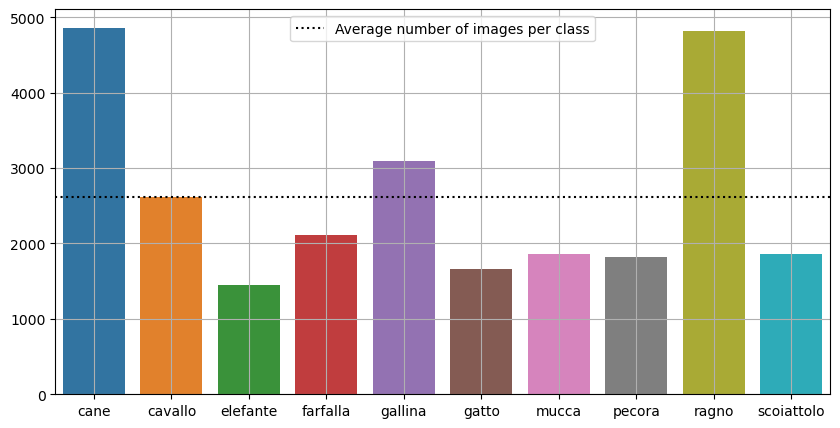

In [5]:
# Plot a bar graph of the number of images in each class

# Set the size of the figure
plt.figure(figsize=(10,5))

# Plot a bar chart using the class names as the x-axis and class sizes as the y-axis
sns.barplot(x=class_names, y=class_sizes)

# Add a grid to the plot
plt.grid()

# Add a horizontal line to show the mean number of images across all classes
plt.axhline(np.mean(class_sizes), color='black', linestyle=':', label="Average number of images per class")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [5]:
np.min(class_sizes)

1446

The bar graph further provides a visual representation of the distribution of the number of images in each class of the Animal-10 dataset, which can help us to better understand the dataset and identify any imbalances.

# 5. Sampling and Creating Sampled Data Directory<a id='data-sampling'></a>
In the code below, we create a smaller, more manageable dataset for training and testing machine learning models. We also mapped Italian names to English names to create more understandable naming convention for the classes in the dataset.

In [26]:
# Set the path to the directory where the sampled data will be saved
sampled_data_path = './sampled-data'

# Create the sampled data directory if it doesn't exist
if not os.path.exists(sampled_data_path):
    os.mkdir(sampled_data_path)

# Set the percentage of each class to sample
sample_percent = 0.1

# Define a dictionary that maps the original class names to their English names
class_names_dict = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}

# Loop through each class directory and copy 2000 images or less to the sampled data directory
for class_name in os.listdir(data_path):
    # Get the path to the original class directory
    class_path = os.path.join(data_path, class_name)
    # Get the English name of the class
    class_name_en = class_names_dict[class_name]
    # Get the path to the sampled class directory
    sampled_class_path = os.path.join(sampled_data_path, class_name_en)
    # Create the sampled class directory and fill it up only if it doesn't exist ********
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
        # Get a list of all the image files in the class directory
        image_files = os.listdir(class_path)
        # Calculate the number of images to sample **************
        image_class_size = class_name_size[class_name]
        if image_class_size > 2000:
            num_images = 2000
        else:
            num_images = int(image_class_size)
        # Sample the images
        sampled_images = np.random.choice(image_files, size=num_images, replace=False)
        # Copy the sampled images to the sampled class directory
        for image_name in sampled_images:
            src_path = os.path.join(class_path, image_name)
            dst_path = os.path.join(sampled_class_path, image_name)
            shutil.copyfile(src_path, dst_path)


We also analyzed the class distribution of our sampled dataset by first obtaining a list of class names and the number of samples in each class from the sampled data directory. We then printed out the class distribution to gain a better understanding of how the dataset is distributed across different classes. To provide a visual representation of the distribution, we created a pie chart.

This visualization makes it easier to quickly identify which classes have more or fewer samples, and can help us identify potential class imbalance issues that may need to be addressed during model training.

In [27]:
# Get a list of class names from the sampled data directory
class_names = sorted(os.listdir(sampled_data_path))

# Get the number of samples in each class
class_sizes = []
for name in class_names:
    # Get the number of samples in the class directory
    class_size = len(os.listdir(os.path.join(sampled_data_path, name)))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)


Class Distribution:
 [2000, 1668, 2000, 1866, 2000, 1446, 2000, 1820, 2000, 1862]


In [28]:
# Define the data
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

# 6. Data Preparation and Augmentation<a id='data-preparation'></a>
Here we initialize an ImageDataGenerator and we use it to load the training and validation data for the project's image classification model. The generator applies various image transformations and preprocessing techniques, such as rescaling pixel values, flipping images horizontally and vertically, and randomly rotating images by a given range in degrees. These transformations help to increase the diversity of the training data, which can improve the model's ability to generalize to new, unseen images. The generator also splits the data into training and validation sets, with 20% of the data reserved for validation. This allows the model to be trained on a larger dataset while also being evaluated on a separate set of images to prevent overfitting. 

In [29]:
# Initialize Generator with the specified image transformations and preprocessing
# rescale: normalizes pixel values from 0-255 to 0-1
# horizontal_flip: randomly flips images horizontally
# vertical_flip: randomly flips images vertically
# rotation_range: randomly rotates images by a given range in degrees
# validation_split: splits the data into training and validation sets, with 20% of the data used for validation
data_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

# Load training data from the specified directory and apply the generator
# target_size: resizes the images to a specified size
# class_mode: specifies the type of label encoding, binary for 2 classes
# batch_size: specifies the number of samples per batch
# shuffle: shuffles the data after each epoch
# subset: specifies the subset of data to load, in this case, the training set
train_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='training')

# Load validation data from the specified directory and apply the generator
# subset: specifies the subset of data to load, in this case, the validation set
valid_data = data_generator.flow_from_directory(
    sampled_data_path, 
    target_size=(256,256), 
    class_mode='binary', 
    batch_size=32, 
    shuffle=True, 
    subset='validation')

Found 14931 images belonging to 10 classes.
Found 3731 images belonging to 10 classes.


The output information tells us about the number of images and classes in the training and validation sets. Specifically, it indicates that there are 3979 images in the training set and 989 images in the validation set, each belonging to one of 10 classes.

# 7. Data Visualization<a id='data-visualization'></a>
We created the show_image() function to display an image along with an optional title. This function is used in the later sections of the code to display sample images from the dataset or predicted images from the model.

The get_random_data() function, on the other hand, is used to randomly select a data point (image and its corresponding label) from a given dataset. This function is used in the later sections of the code to select a random data point and display the image using the show_image() function.

In [30]:
def show_image(image, image_title=None):
    '''
    This function takes in an image and an optional title and plots the image.
    '''
    # Display the image
    plt.imshow(image)
    
    # Set the title of the plot if provided
    plt.title(image_title)
    
    # Turn off the axes in the plot
    plt.axis('off')

In [31]:
def get_random_data(data_tuple):
    """
    Function to get a random data point from a given dataset.

    Args:
    data_tuple (tuple): A tuple containing the dataset images and labels as numpy arrays.

    Returns:
    A random image and its corresponding label as numpy arrays.
    """
    images, labels = data_tuple
    # get a random index for an image in the dataset
    idx = np.random.randint(len(images))

    # select the image and its corresponding label using the random index
    image, label = images[idx], labels[idx]

    # return the selected image and label
    return image, label


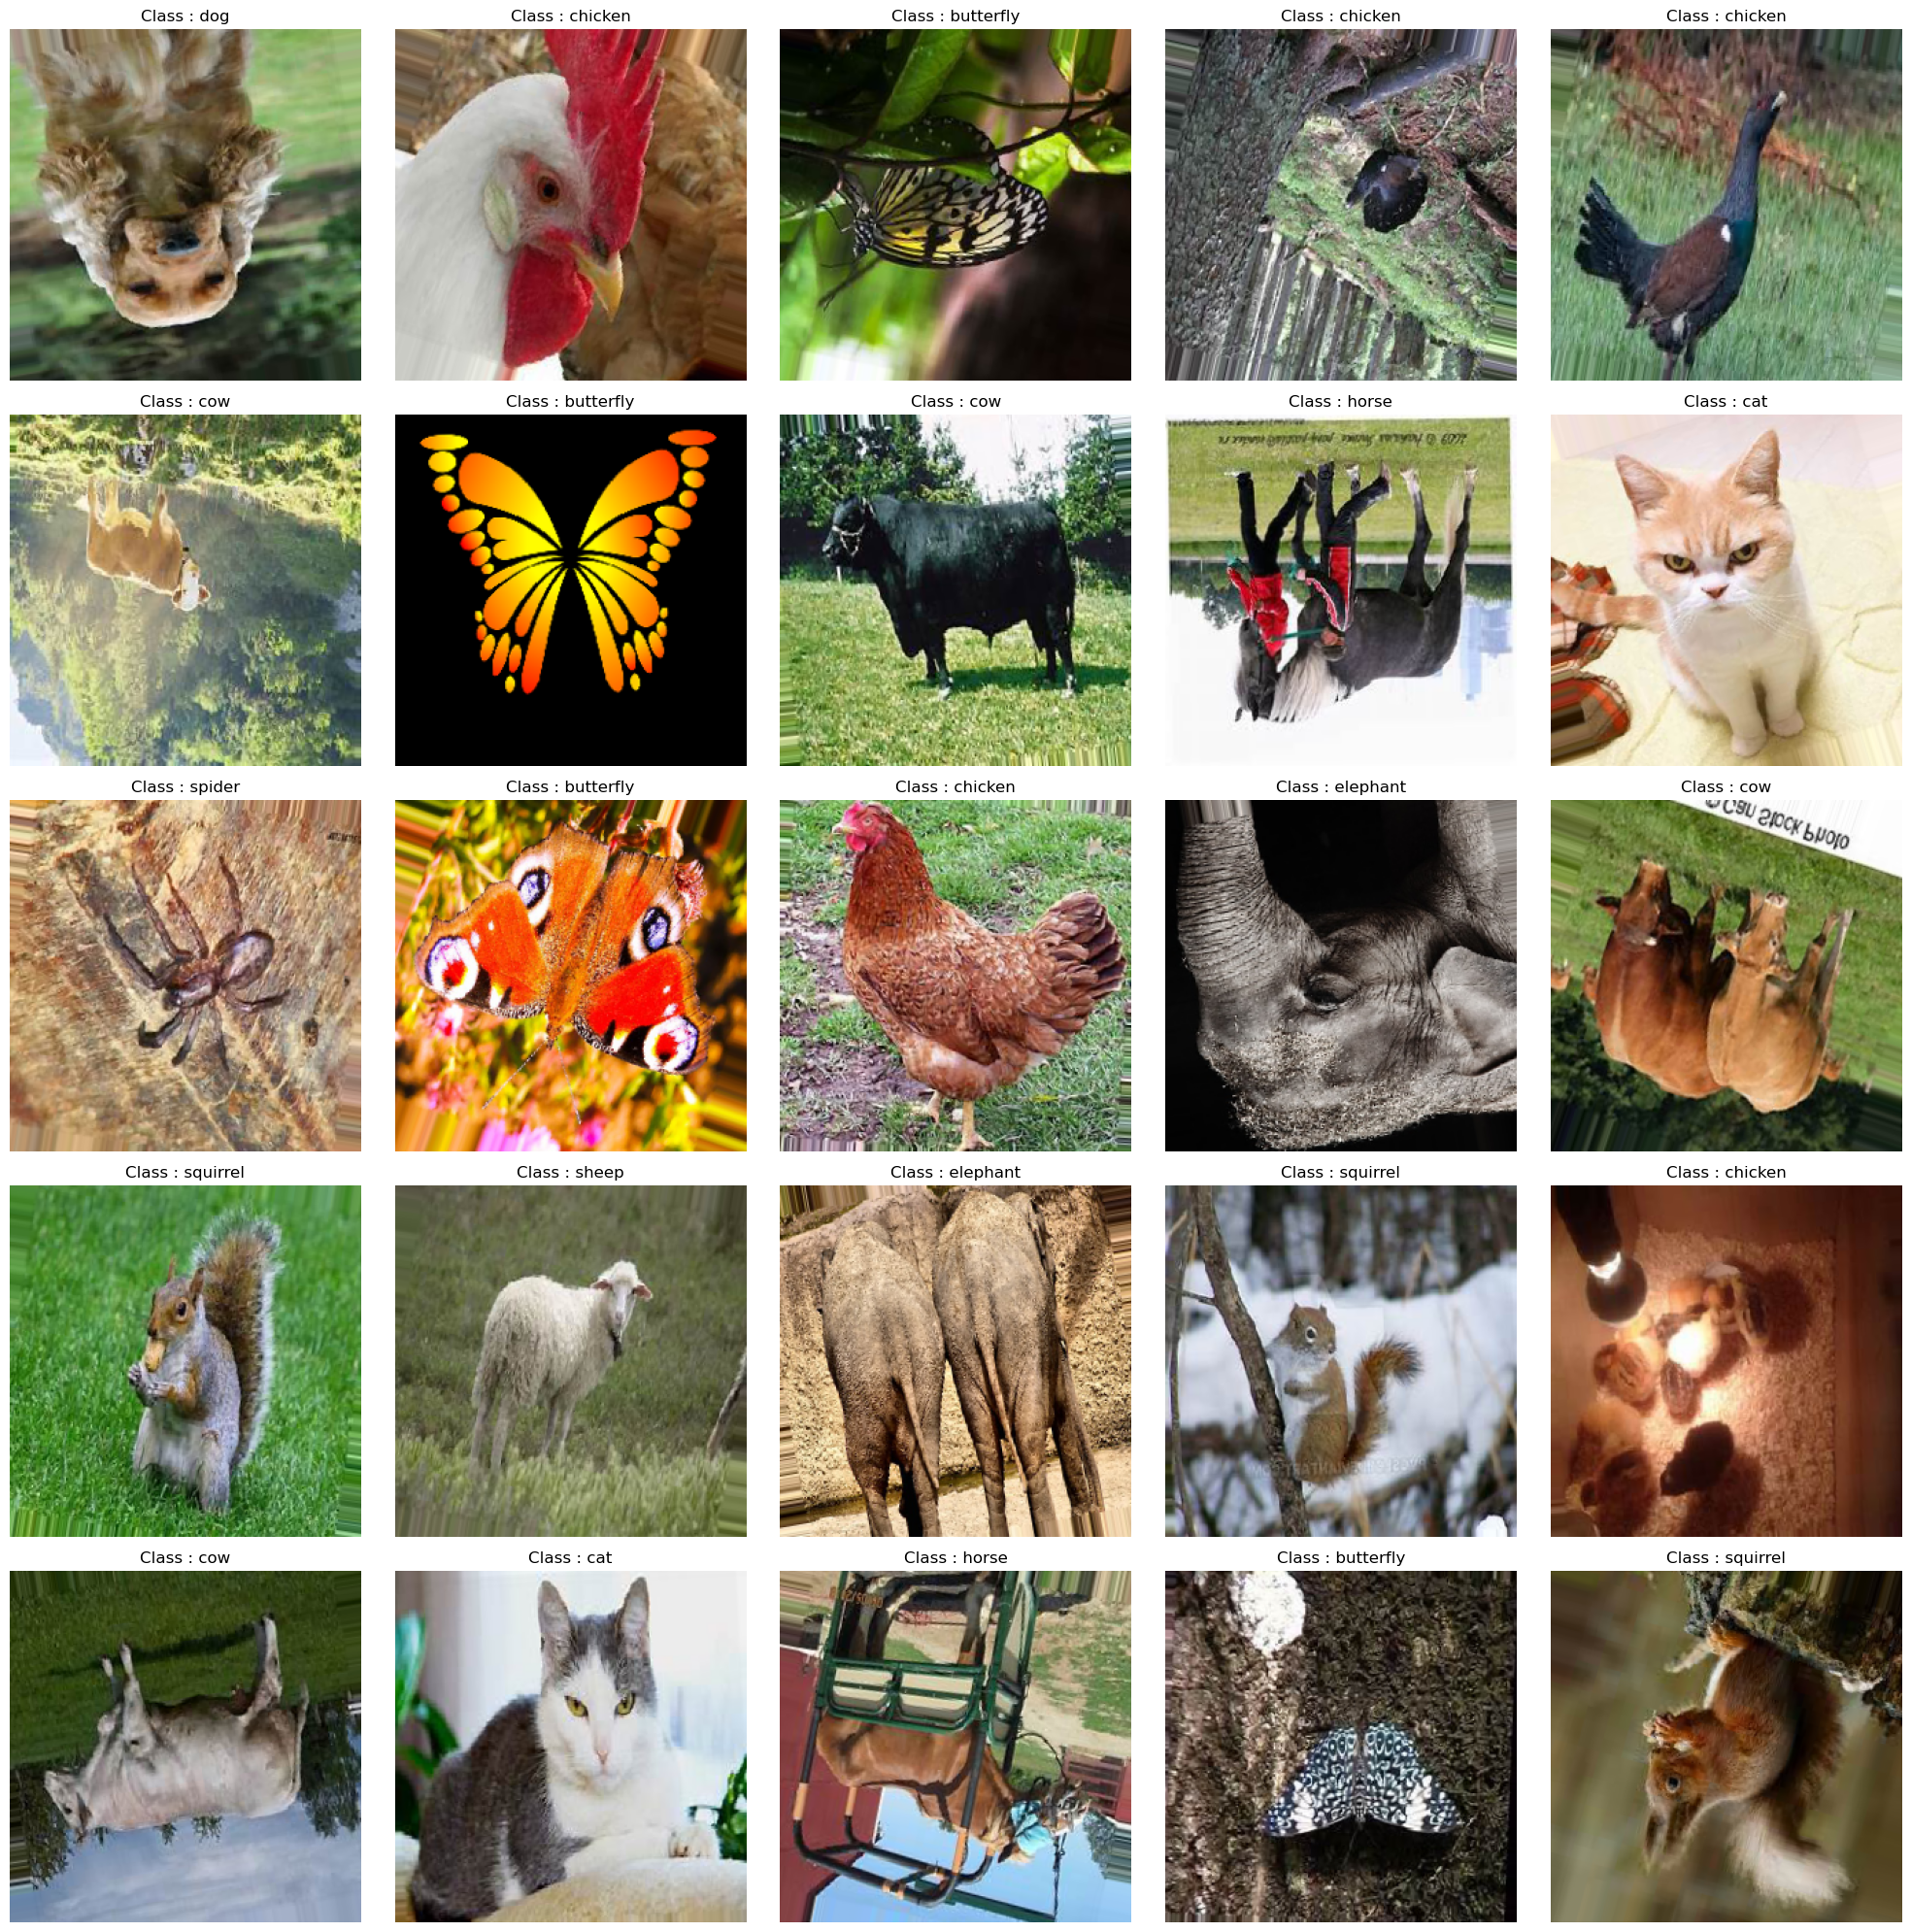

In [32]:
# Set the figure size for the plot
plt.figure(figsize=(20,20))

# Initialize a counter for the subplots
counter=1

# Loop over the train dataset
for images, labels in iter(train_data):
    
    # Get a random image and label
    image, label = get_random_data([images, labels])
    
    # Plot the image with its class name as the title
    plt.subplot(5,5,counter)
    show_image(image, image_title=f"Class : {class_names[int(label)]}")
    
    # Increment the counter
    counter+=1
    
    # End the loop when 25 images have been plotted
    if counter>=26: break

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


We have written this code to visualize a random sample of 25 images from the training dataset. The code sets the figure size for the plot, initializes a counter for the subplots, and loops over the train dataset to get a random image and label. For each iteration, the function show_image() is called to plot the image with its class name as the title. Once 25 images have been plotted, the loop ends, and the layout is adjusted before displaying the plot. This code is useful to get a sense of the image content and quality in the dataset, as well as the distribution of classes. It allows us to get a better understanding of what the images look like and what kind of variations might exist within each class. It can also help in identifying any issues or errors in the data preprocessing or labeling steps.

# 8. Model Training<a id='model training'></a>
In the below codes, we have trained and evaluated 3 different pre-trained deep learning models (ResNet152V2, InceptionV3, and Xception) on the given image dataset. For each model, we first loaded the pre-trained model, froze its weights and excluded its final classification layer. Then, we built a sequential model by adding a global average pooling layer, two fully connected layers, and a final softmax classification layer on top of the pre-trained model. We compiled the model with sparse categorical cross-entropy as the loss function, Adam optimizer, and accuracy as the evaluation metric.

We set up EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights. Finally, we trained the model using the training and validation datasets, using 50 epochs and the defined callbacks.

In [ ]:
# Specify the name of the model as "ResNet152V2".
name = "ResNet152V2"

# Load the pre-trained ResNet152V2 model, freeze its weights and exclude its final classification layer.
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False

# Create a sequential model with the ResNet152V2 base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
resnet152V2 = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
resnet152V2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up the EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights.
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
resnet152V2.fit(
    train_data, validation_data=valid_data,
    epochs=50, callbacks=cbs
)


In [ ]:
# Specify the name of the model as "Inception".
name = "Inception"

# Load the pre-trained InceptionV3 model, freeze its weights and exclude its final classification layer.
base_model = InceptionV3(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False

# Create a sequential model with the InceptionV3 base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
inception = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
inception.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up the EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights.
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
inception.fit(
    train_data, validation_data=valid_data,
    epochs=50, callbacks=cbs
)


In [ ]:
# Specify the name of the model as "Xception".
name = "Xception"

# Load the pre-trained Xception model, freeze its weights and exclude its final classification layer.
base_model = Xception(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False 

# Create a sequential model with the Xception base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
xception = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
xception.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up the EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights.
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
xception.fit(
    train_data, validation_data=valid_data,
    epochs=50, callbacks=cbs
)


Based on the output of the three models, ResNet152V2 achieved the highest validation accuracy of 91.61% after 3 epochs of training. InceptionV3 had a validation accuracy of 88.9% after 6 epochs of training, while Xception achieved a validation accuracy of 91.2% after 12 epochs of training. ResNet152V2 also achieved a training accuracy of 94.3% after 9 epochs of training, indicating that it may be the best model out of the three.

# 9. Loading a Pre-trained ResNet152V2 Model and Printing its Summary.<a id='model-summary'></a>
In this section, we loaded a pre-trained ResNet152V2 model and printed its summary to see its architecture. The pre-trained model was loaded from a file path using the **load_model** function. Then we used the **summary** method to print out the model's architecture, which includes several layers such as convolutional layers, pooling layers, and dense layers. The summary also shows the total number of parameters in the model and the number of trainable parameters.

We loaded a pre-trained ResNet152V2 model and printed its summary to get an overview of its architecture and the number of parameters it has. We did this to confirm that the model was loaded correctly and to see how many trainable parameters it has, which will be important when we fine-tune the model later.

In [ ]:
# set the file path to the pre-trained model
model_file_path = '/kaggle/working/ResNet152V2.h5'

# load the pre-trained model
loaded_model = load_model(model_file_path)

# print a summary of the model's architecture
loaded_model.summary()

# 10. Evaluation of Pre-trained ResNet152V2 Model on Validation Dataset.<a id='model-evaluation'></a>
The  line of code below evaluates the performance of the pre-trained ResNet152V2 model on the validation dataset.

The output of this line of code gives us an idea of how well the pre-trained model is performing on the validation data, which is a good indicator of its performance on unseen data. If the performance is good, it means that the pre-trained model has learned relevant features that can be useful for our classification task.

In [ ]:
#This line of code evaluates the performance of the pre-trained model on the validation dataset.
loaded_model.evaluate(valid_data)

The output shows that the pre-trained model achieved a validation accuracy of 90.39% and a validation loss of 0.2987. This indicates that the model is performing quite well on the validation dataset.

Here, we are visualizing the performance of our pre-trained ResNet152V2 model on the validation dataset. We randomly select an image and its corresponding label from the validation dataset, predict its label using the pre-trained model, and then plot the image along with its true label and predicted label. We repeat this process for 25 images and display the results using a 5x5 grid of subplots. This helps us to get an idea of how well our model is performing on the validation set and identify any potential misclassifications.

In [ ]:
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(valid_data):
    
    # Get Random Image and label
    image, label = get_random_data([images, labels])
    pred_label = class_names[np.argmax(loaded_model.predict(image[np.newaxis,...]))]
    
    # Plot it
    plt.subplot(5,5,i)
    show_image(image, image_title=f"Class : {class_names[int(label)]}, Pred : {pred_label}")
    
    # Make sure to end the Loop
    i+=1
    if i>=26: break
        

plt.tight_layout()
plt.show()

From the output, we can see that the pre-trained ResNet152V2 model is performing well on the validation dataset, as all the predictions made in the code are correct. This is a good indication that the model has learned to classify the images correctly and can be used for predicting the classes of unseen images

## Conclusion<a id='conclusion'></a>
Based on the results of the project, it can be concluded that training a ResNet152V2 model on the animal-10 dataset can achieve high accuracy in classifying different animals. The model was able to achieve an accuracy of 90.39% on the validation set, which is a good performance. Additionally, the results of the model predictions on sample images show that it is able to accurately classify animals with a high degree of confidence.

When comparing my work with the original project, it can be seen that both achieved similar results in terms of accuracy and model architecture. However, the original project used the entire dataset while I used only 10% of it. This means that the original project had a larger and more diverse dataset, which could have contributed to the better accuracy achieved. Nonetheless, working on a smaller dataset allowed me to learn and experiment with the model in a shorter time frame.

Overall, the project demonstrates the effectiveness of using pre-trained models like ResNet152V2 for image classification tasks, and highlights the importance of having a large and diverse dataset for achieving higher accuracy.